# Mandatory Exercise - Session 4

### Students: Jan Carbonell & Nafis

### Lab Objective:
The Objective of this lab is to train, test and benchmark the outcome of different Part of Speech (POS) models against the threebank corpus. 


In [1]:
# initial imports. Could also be done in the pc environment
import nltk
import dill
from nltk.corpus import treebank

# additional dependencies from each model
from nltk.tag import tnt
from nltk.tag import CRFTagger
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.tag.perceptron import PerceptronTagger

Setting the initial conditions stated in the problem, starting the dictionary and initializing the models outside of the loop

In [2]:
train_stop = [500, 1000, 1500, 2000, 2500, 3000]
test_data = treebank.tagged_sents()[3001:]

accuracy = {'HMM':[], 'TnT':[], 'PER':[], 'CRF':[]}

In [3]:
for e in train_stop:
    #reviewing that we are on the right track
    print('Training with {} sentences'.format(e))
    
    train_data = treebank.tagged_sents()[:e]
    
    #HMM
    trainer = HiddenMarkovModelTrainer()
    HMM = trainer.train_supervised(train_data)
    accuracy['HMM'] += [round(HMM.evaluate(test_data), 3)]
    
    #TNT
    TnT = tnt.TnT()
    TnT.train(train_data)
    accuracy['TnT'] += [round(TnT.evaluate(test_data), 3)]
        
    #PER
    PER = PerceptronTagger(load=False)
    PER.train(train_data)
    accuracy['PER'] += [round(PER.evaluate(test_data), 3)]
    
    #CRF
    CRF = CRFTagger()
    CRF.train(train_data, 'crf_tagger_model')
    accuracy['CRF'] += [round(CRF.evaluate(test_data), 3)]
    
#verification that it is properly stored
for keys,values in accuracy.items():
    print(keys, values)

Training with 500 sentences
Training with 1000 sentences
Training with 1500 sentences
Training with 2000 sentences
Training with 2500 sentences
Training with 3000 sentences
HMM [0.173, 0.221, 0.262, 0.304, 0.335, 0.369]
TnT [0.747, 0.796, 0.828, 0.849, 0.862, 0.876]
PER [0.912, 0.933, 0.942, 0.949, 0.953, 0.959]
CRF [0.91, 0.925, 0.933, 0.939, 0.943, 0.948]


Moving into plotting

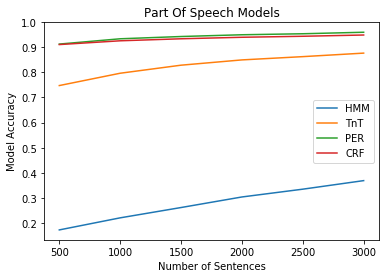

In [6]:
#adding the necessary packages for plotting
import matplotlib.pyplot as plt

#preparing and plotting  the data
plt.figure()
x = train_stop
plt.plot(x, accuracy['HMM'], label='HMM')
plt.plot(x, accuracy['TnT'], label='TnT')
plt.plot(x, accuracy['PER'], label='PER')
plt.plot(x, accuracy['CRF'], label='CRF')

#adding the legend showing the plot
plt.xlabel('Number of Sentences')
plt.ylabel('Model Accuracy')
plt.title('Part Of Speech Models')
plt.legend()
plt.show()

## Conclusions

As